#Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data loading and Inspection**

In [3]:
data = pd.read_csv('/content/Airbnb_Open_Data.csv')

<ipython-input-3-96e24c90830d>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Airbnb_Open_Data.csv')


Explore the data


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

-From the results of this function, we can see that our dataframe contain 102 599 records and a total of 26 columns.
-We also see that there are missing values in most of our columns.
-Column names are not consistent. Name column is in uppercases while other column names are in lowercases.
-We see that other column names contain spaces between them while others are separated by an underscore character


# Show the first 10 entries of the data frame

In [5]:
data.head(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


# **Data cleaning process**

1. Ensure consistent column name: The output of the info() showed us that there is inconsistency in column names.
The id column name was in lower cases while the name column name was in upper cases.
Other column names had spaces between words and others had underscores between them.
To fix these inconsistencies we are going to use the strpip(), lower() and replace() from str


In [6]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ','_')

2. Remove irrelevent columns

In [7]:
data = data.drop(columns=['id','host_id','host_identity_verified','lat','long','country','country_code','calculated_host_listings_count','house_rules','license','last_review'], axis=1)
print(data.shape) # Inspect the number of rows and columns


(102599, 15)


3. Convert column data types: From the dataset we can see that the price and service_fee columns are of string type since the values have a dollar sign before the numbers.
We will convert them to float type by removing the dollar sign from each value and placing it next to each column name.
Rename the column names of price and service_fee

In [9]:
data.rename(columns={'price':'price($)','service_fee':'service_fee($)'}, inplace= True)

#Remove the dollar sign and the comma from the price values
data['price($)'] = data['price($)'].str.strip('$')
data['price($)'] = data['price($)'].str.replace(',','')

#Remove the dollar sign from the service_fee values
data['service_fee($)'] = data['service_fee($)'].str.strip('$')

#Convert the data type of price from string to float
data['price($)'] = data['price($)'].astype(float)
data['service_fee($)'] = data['service_fee($)'].astype(float)


4. Handling missing values

In [10]:
#Check for missing values
print(data.isnull().sum())

name                     250
host_name                406
neighbourhood_group       29
neighbourhood             16
instant_bookable         105
cancellation_policy       76
room_type                  0
construction_year        214
price($)                 247
service_fee($)           273
minimum_nights           409
number_of_reviews        183
reviews_per_month      15879
review_rate_number       326
availability_365         448
dtype: int64


- Imputing categorical columns

In [11]:
# Impute the name column with the 'no name provided' value
data['name'] =data['name'].fillna("No Name Provided")

In [12]:
# Impute the name column with the 'unknown' value
data['host_name'] = data['host_name'].fillna('Unknown')
data['neighbourhood_group'] = data['neighbourhood_group'].fillna('unknown')
data['neighbourhood'] = data['neighbourhood'].fillna('unknown')

In [13]:
# Impute with the most common value
data['instant_bookable'] = data['instant_bookable'].fillna(data['instant_bookable'].mode()[0])
data['cancellation_policy'] = data['cancellation_policy'].fillna(data['cancellation_policy'].mode()[0])

<ipython-input-13-85b808ea71fe>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['instant_bookable'] = data['instant_bookable'].fillna(data['instant_bookable'].mode()[0])


- Check to see if the missing values of categorical variables have been fixed

In [14]:
print(data.isnull().sum())

name                       0
host_name                  0
neighbourhood_group        0
neighbourhood              0
instant_bookable           0
cancellation_policy        0
room_type                  0
construction_year        214
price($)                 247
service_fee($)           273
minimum_nights           409
number_of_reviews        183
reviews_per_month      15879
review_rate_number       326
availability_365         448
dtype: int64



- Imputing numeric columns

1. Check the distribution of the variables to determine whether to impute with the mean or the median

<Axes: title={'center': 'Box-plot of listing prices'}, xlabel='price($)'>

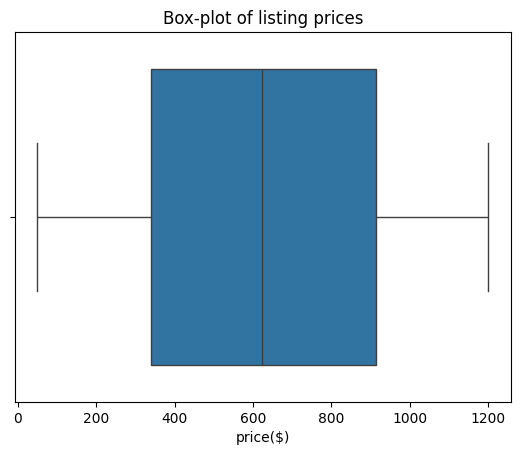

In [15]:
plt.title('Box-plot of listing prices')
sns.boxplot(x='price($)',data=data)

- Since the box-plot shows that the data is normally distributed and no outliers, I'm going to use the mean

In [35]:
data['price($)'] = data['price($)'].fillna(data['price($)'].mean())

<Axes: xlabel='service_fee($)'>

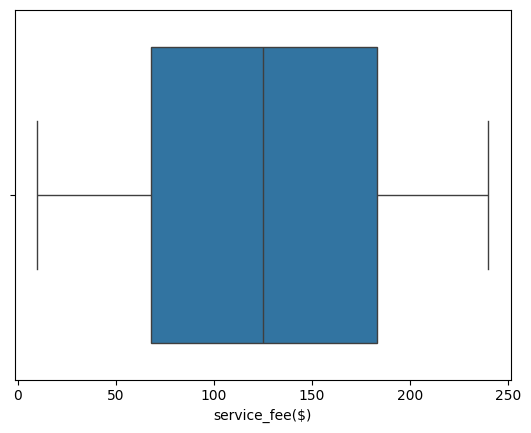

In [16]:
#Check the distribution of the service_fee($) variable
sns.boxplot(x='service_fee($)', data=data)

- Since the data is normally distributed and no outliers, we are going to impute using the mean

In [34]:
data['service_fee($)'] = data['service_fee($)'].fillna(data['service_fee($)'].mean())

<Axes: xlabel='construction_year'>

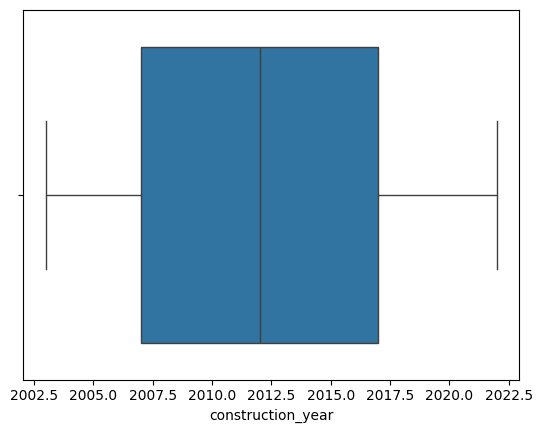

In [17]:
sns.boxplot(data=data, x = 'construction_year')

In [33]:
data['construction_year'] = data['construction_year'].fillna(data['construction_year'].mean())

In [25]:
 #Since the data has outliers, I am going to impute using a median
data['minimum_nights'] = data['minimum_nights'].fillna(data['minimum_nights'].median())

<Axes: xlabel='number_of_reviews'>

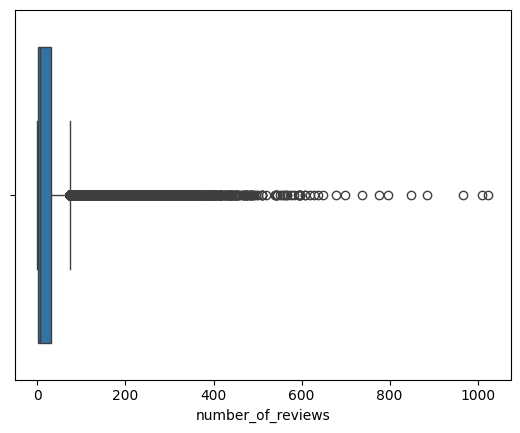

In [26]:
sns.boxplot(data=data, x='number_of_reviews')

In [27]:
#Since the data has outliers, I am going to impute using a median
data['number_of_reviews'] = data['number_of_reviews'].fillna(data['number_of_reviews'].median())

<Axes: xlabel='reviews_per_month'>

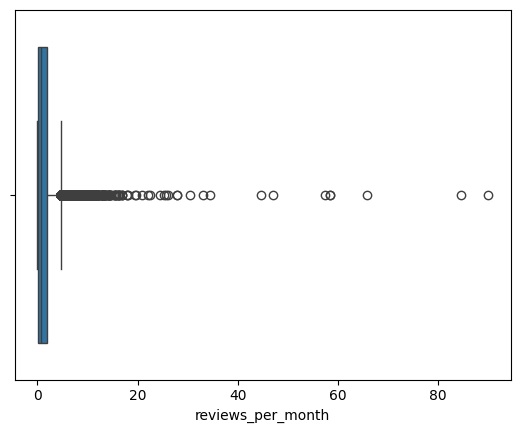

In [28]:
sns.boxplot(data=data, x='reviews_per_month')

In [29]:
#Since the data has outliers, I am going to impute using a median
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].median())

<Axes: xlabel='review_rate_number'>

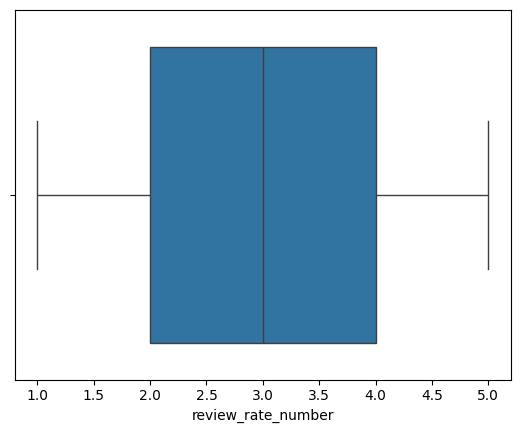

In [30]:
sns.boxplot(data=data, x='review_rate_number')

In [31]:
#Since the data has no outliers, I am going to impute using a mean
data['review_rate_number'] = data['review_rate_number'].fillna(data['review_rate_number'].mean())

<Axes: xlabel='availability_365'>

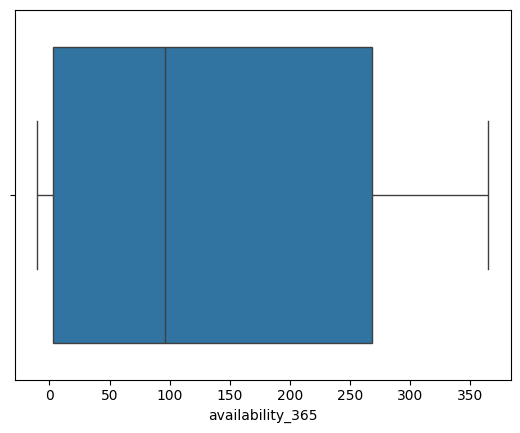

In [23]:
sns.boxplot(data=data, x='availability_365')

In [19]:
#Since the data has an outliers, I'm going to fix it since the upper limit is 365
for x in data.index:
    if data.loc[x,'availability_365'] > 365.0:
       data.loc[x,'availability_365']= 365.0
    else:
        continue

In [22]:
data['availability_365'] = data['availability_365'].fillna(data['availability_365'].median())

In [36]:
# Check if there is still missing values
print(data.isnull().sum())

name                   0
host_name              0
neighbourhood_group    0
neighbourhood          0
instant_bookable       0
cancellation_policy    0
room_type              0
construction_year      0
price($)               0
service_fee($)         0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
review_rate_number     0
availability_365       0
dtype: int64


5. Remove duplicate or irrelevant observations:

- Show the number of duplicates in the dataframe

In [37]:
print(data.duplicated().sum())

6566


- Remove duplicates

In [38]:
data = data.drop_duplicates()

In [39]:
print(data.duplicated().sum())

0


# Basic Statistic summary

In [42]:
# Group numeric variables
cols = ['price($)','service_fee($)','number_of_reviews','review_rate_number','availability_365','reviews_per_month','minimum_nights','construction_year']
data[cols].describe()

,price($),service_fee($),number_of_reviews,review_rate_number,availability_365,reviews_per_month,minimum_nights,construction_year
count,96033.000000,96033.000000,96033.000000,96033.000000,96033.000000,96033.000000,96033.000000,96033.000000
mean,625.140061,124.994006,27.623598,3.286089,141.975602,1.277187,8.192496,2012.486815
std,331.360616,66.253671,50.062702,1.279085,133.255926,1.628174,31.209860,5.760088
min,50.000000,10.000000,0.000000,1.000000,-10.000000,0.010000,-1223.000000,2003.000000
25%,340.000000,68.000000,1.000000,2.000000,5.000000,0.280000,2.000000,2008.000000
50%,625.293536,125.000000,7.000000,3.000000,100.000000,0.740000,3.000000,2012.000000
75%,912.000000,182.000000,30.000000,4.000000,270.000000,1.710000,5.000000,2017.000000
max,1200.000000,240.000000,1024.000000,5.000000,365.000000,90.000000,5645.000000,2022.000000


# Exploring the relationships between numeric variables

                    price($)  service_fee($)  number_of_reviews  \
price($)            1.000000        0.997690           0.005146   
service_fee($)      0.997690        1.000000           0.005039   
number_of_reviews   0.005146        0.005039           1.000000   
review_rate_number -0.005160       -0.004961          -0.017828   
availability_365   -0.002840       -0.003177           0.094510   
reviews_per_month   0.005057        0.004925           0.590450   
minimum_nights     -0.003372       -0.003560          -0.047786   
construction_year  -0.003290       -0.002951           0.002817   

                    review_rate_number  availability_365  reviews_per_month  \
price($)                     -0.005160         -0.002840           0.005057   
service_fee($)               -0.004961         -0.003177           0.004925   
number_of_reviews            -0.017828          0.094510           0.590450   
review_rate_number            1.000000         -0.006626           0.034562   
a

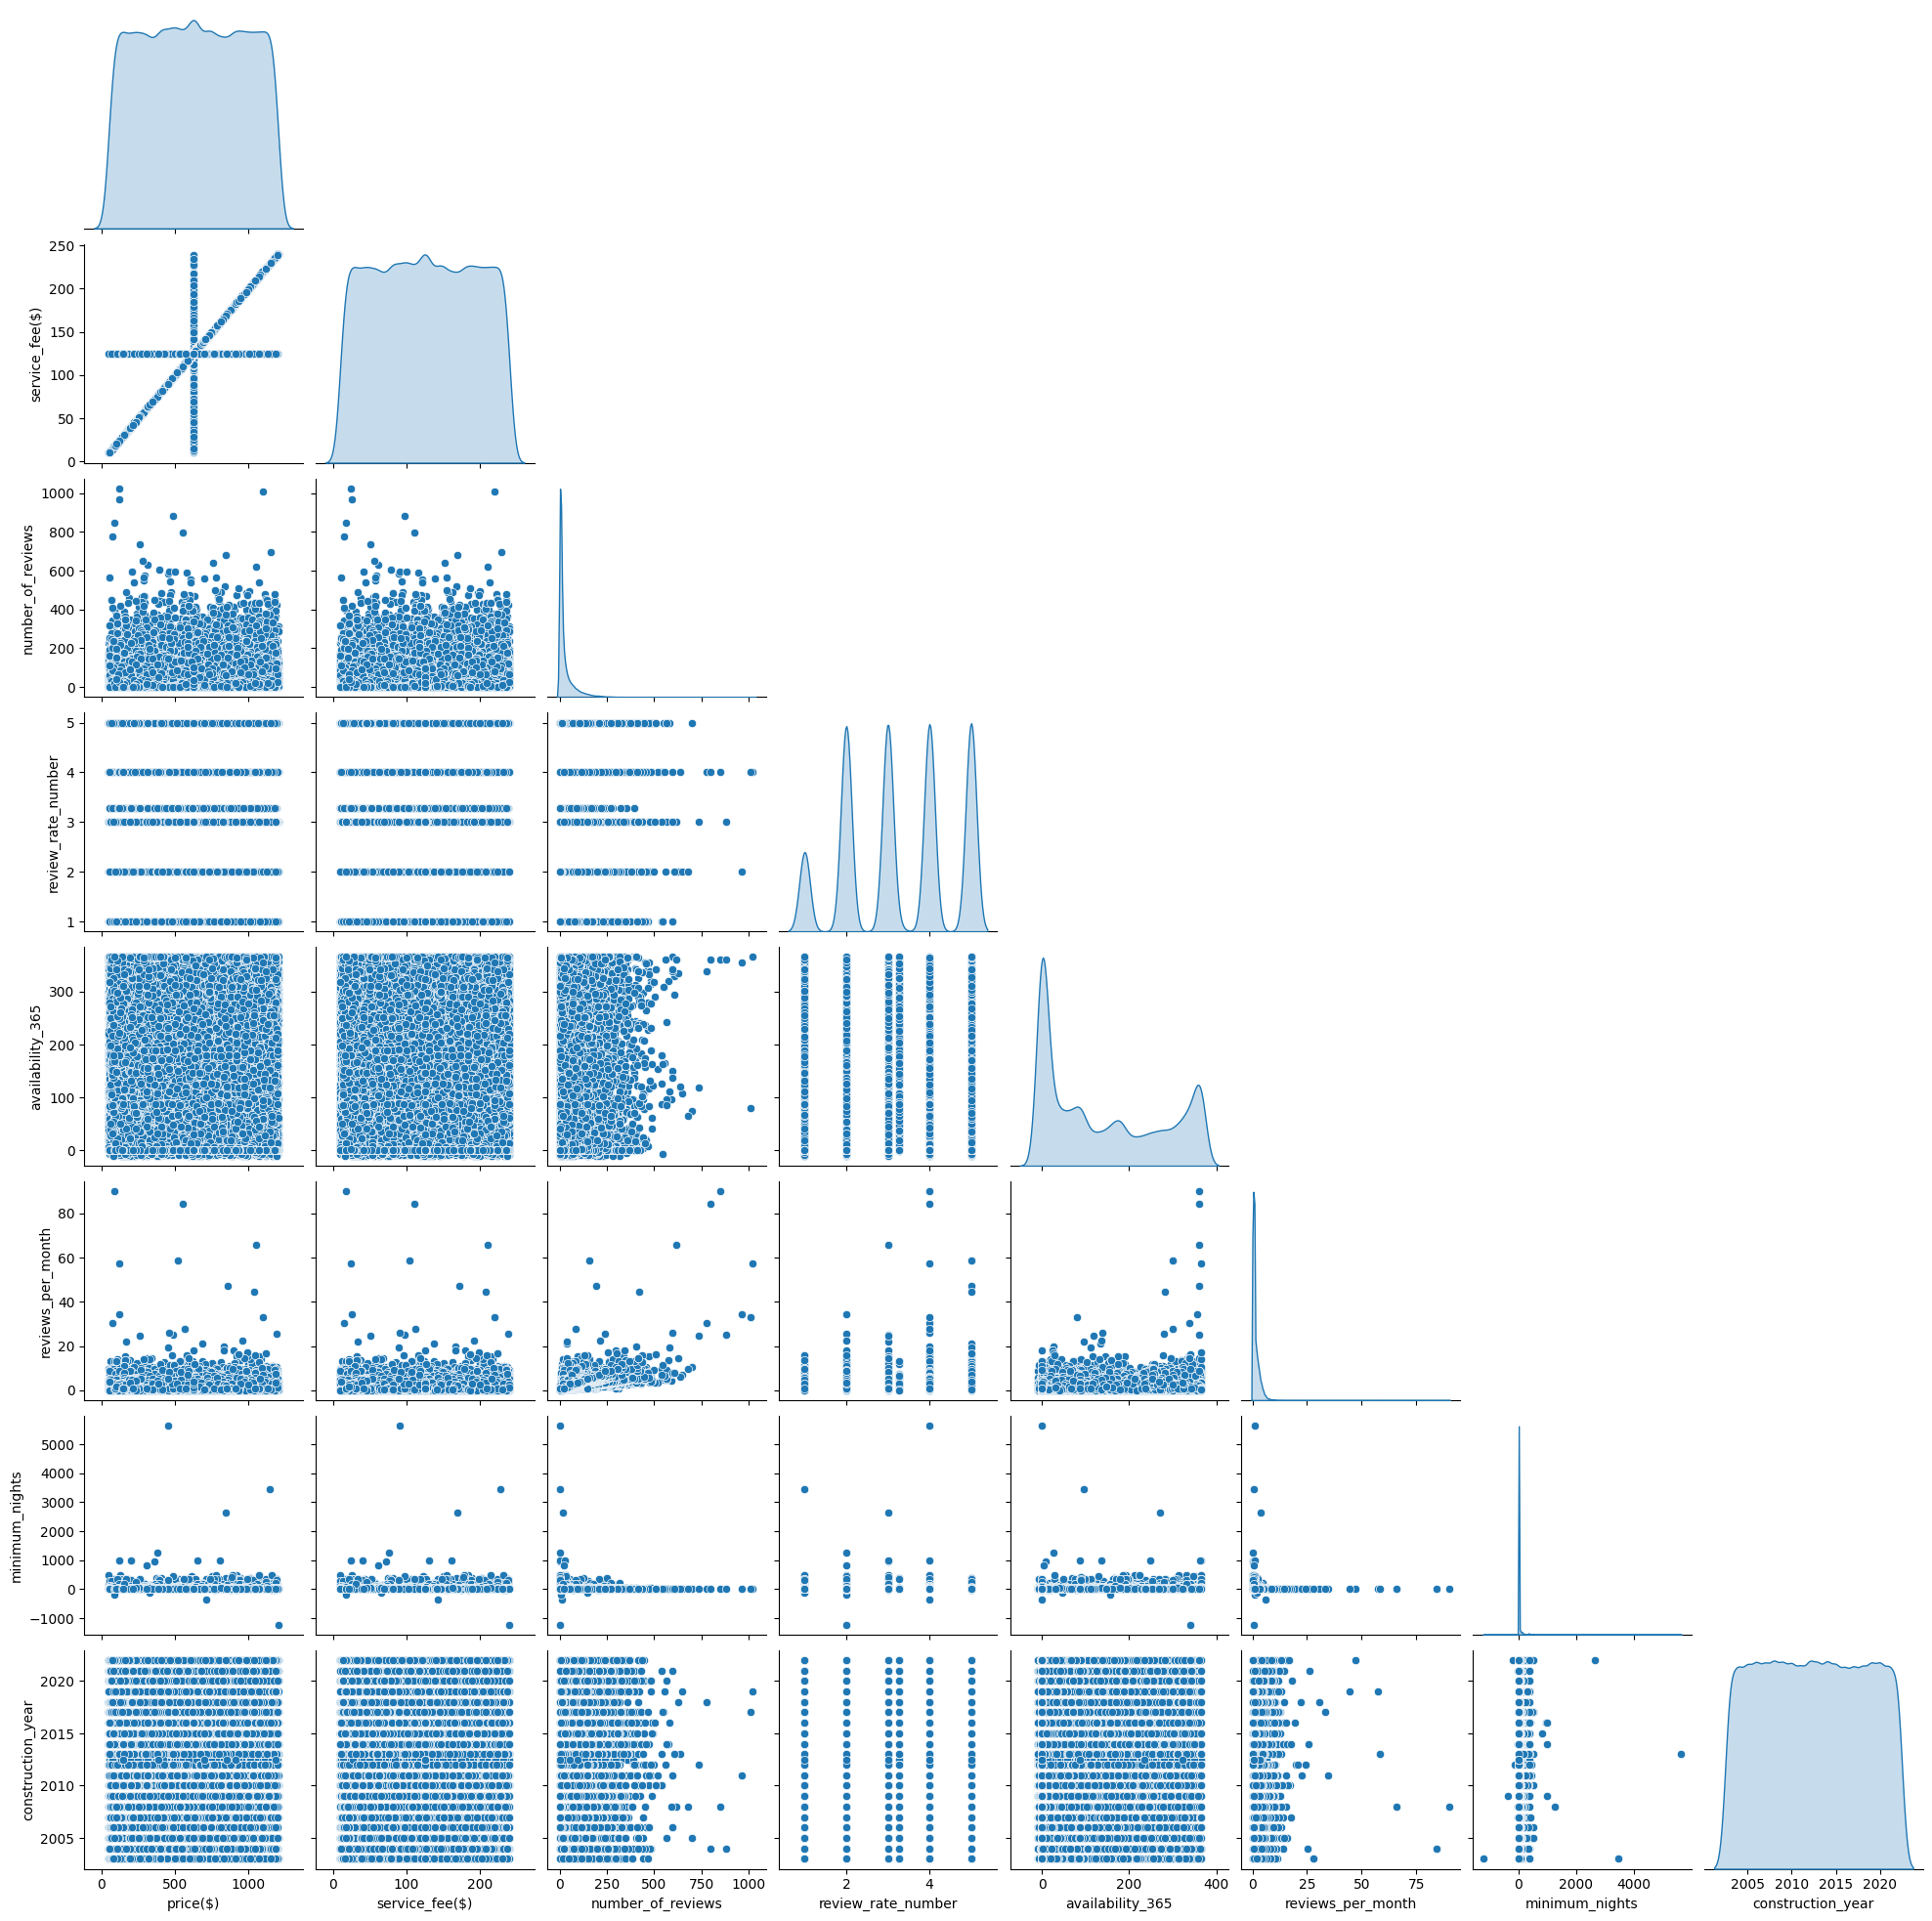

In [46]:
print(data[cols].corr())
sns.pairplot(data[cols], diag_kind="kde", corner=True)
plt.show()

Based on these scatter plots and correlation values:
- We see that there is a strong posivite relationship between price and service fee (0.99769)
- There is a weak positive relationship between reviews_per_month and number of reviews (0.590444)
- And no relationship between the rest of the variabels.

Distributions of the variables:
- price, service fee and construction year are symmetrically distributed but have a large variance
- number of reviews, reviews per month and availability have a distribution that is skewed to the right
- review_rate_number distribution is multimodal

# Exploring patterns

<Axes: title={'center': 'Prices by room_types'}, xlabel='room_type', ylabel='price($)'>

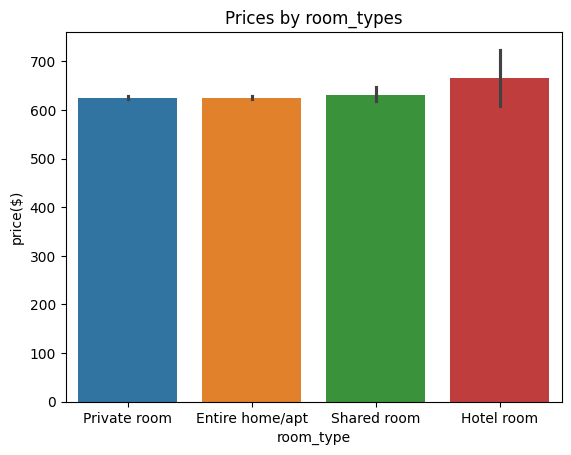

In [48]:
#Room Type vs Price- Boxplot
plt.title('Prices by room_types')
sns.barplot(x='room_type', y='price($)', hue='room_type', data=data)

Based on the bar plot, we see that Hotel room prices are slightly greater than the other listing types


<ipython-input-49-311c8898a06b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="room_type", data=data, palette="Set2")


<Axes: title={'center': 'Room Type count'}, xlabel='room_type', ylabel='count'>

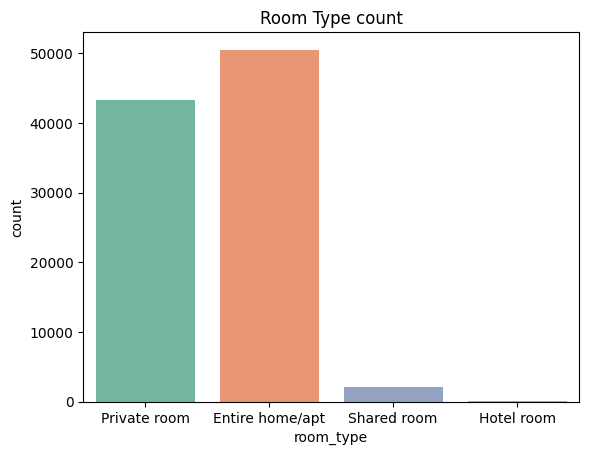

In [49]:
plt.title("Room Type count")
sns.countplot(x="room_type", data=data, palette="Set2")

- Based on this plot we can see that the apartment listings are greater than the other listing types,
- followed by private room and the Hotels are the least listings


Text(0, 0.5, 'Count')

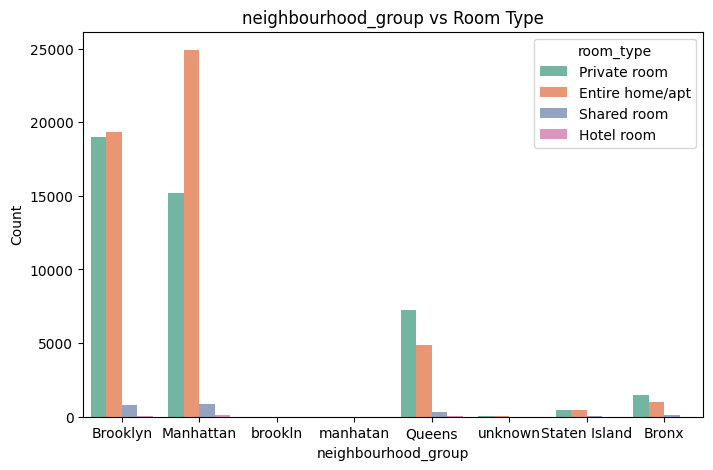

In [50]:
plt.figure(figsize=(8, 5))
sns.countplot(x="neighbourhood_group", hue="room_type", data=data, palette="Set2")
plt.title("neighbourhood_group vs Room Type")
plt.xlabel("neighbourhood_group")
plt.ylabel("Count")

- Based on the plot, we see that Manhattan has more apartment listings, followed by Brooklyn then Queens.
- Brooklyn has more private room listings followed by Manhattan then Queens